# Anatomy of NN

## Layer:

The most fundamental data structure in NN is 'layer'. 

Different layers are appropreate for  different tensor formats and different types of data processing, for example: 
    1. simple vector data, stored in 2D tensors of shape ---> processed by 'densely connect' layers / 'fully connnected' or 'dense' layer;
    2. sequence data, stored in 3D tensors of shape ---> processed by 'recurrent' layers, such as 'LSTM' layer.
    3. image data, stored in 4D tensores of shape ---> processed by '２D convolution layers (Conv2D)

## Models: network of layers

Deep learning model is 'directed', 'acyclic' graph of layers. 
    1. The most importance is a linear stack of layers, mapping a single input to a single output. 
    2. More broader variety of network topologies:

        a. Two-branch  networks,
        b. Multihead networks,
        c. Inception blocks. 
    
The topology space of a network defines a 'hypothesis space'. 

## Loss function  and optimizers

Loss function (objective fuction) -- the quantity that will be minized during training. It represent a mearusre of success for the task at hand. 

Optimizer -- Determins how the newwork will be updated based on the loss function. It implements a specific variant of stochatic gradient descent (SGD).


# Introduction to keras

Typical Keras workflow: 
    1. Define training data: input tensors and target tensors;
    2. Define a networks of layers (or model) mapping inputs to targets;
    3. Configure the learning process by choosing a loss function, an optimizer, and some metrics to monitor;
    4. Iterate on training data by calling the fit() method of model

There are two ways to define a model:
    1. using the Sequential() class (only for linear stack of layers, which is the most common network architectrue by far);
    2. use 'functional API'(for directed acyclic agraphs of layers, which allows builing completely arbitrary architectures)

In [1]:
# examples 
# e1, use sequential class
from keras import models 
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

/home/xinxu/anaconda3/envs/xx-projects/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# e2, use functional api 
input_tensor = layers.Input(shape=(784,))
x1 = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x1)
model = models.Model(inputs=input_tensor, outputs=output_tensor)

# Ex 1 -|- classify movie reviews  (binary classification)

## data preparation

In [8]:
from keras.datasets import imdb

(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)

In [10]:
train_data.shape

(25000,)

In [13]:
for i in range(train_data.shape[0]):
    print(len(train_data[i]))

218
189
141
550
147
43
123
562
233
130
450
99
117
238
109
129
163
752
212
177
129
140
256
888
93
142
220
193
171
221
174
647
233
162
597
234
51
336
139
231
704
142
861
132
122
570
55
214
103
186
113
169
469
138
302
766
351
146
59
206
107
152
186
431
147
684
383
324
252
263
787
211
314
118
390
132
710
306
167
115
95
158
156
82
502
314
190
174
60
145
214
659
408
515
461
202
238
170
107
171
158
145
790
258
287
67
123
975
775
236
195
274
214
91
1038
815
183
206
50
118
147
141
60
56
439
439
213
144
533
303
203
563
129
153
55
92
174
187
183
165
78
198
156
223
127
61
362
84
57
176
159
57
159
165
213
194
149
130
203
19
98
466
525
130
322
153
408
215
472
143
136
354
260
319
125
209
282
810
142
240
148
198
193
123
128
103
479
345
263
165
205
333
184
92
177
335
120
121
259
180
160
114
59
343
513
133
206
152
206
572
153
139
151
129
129
196
433
199
140
311
151
200
584
127
513
781
932
526
161
646
135
52
267
174
185
219
81
219
131
153
270
644
155
546
284
85
293
155
358
45
231
124
178
118
260
393
127


112
282
452
56
206
138
63
133
125
184
294
811
349
199
365
568
65
137
162
152
305
96
150
139
134
321
443
122
149
87
136
134
95
181
794
607
188
522
127
681
104
155
565
215
100
55
611
191
132
117
200
152
162
95
598
338
90
57
327
200
580
290
441
212
313
238
125
578
119
319
228
135
752
181
156
63
191
236
116
304
144
144
323
164
279
235
197
245
118
193
383
157
111
378
295
134
94
134
149
139
158
45
212
100
279
268
319
122
265
220
217
329
187
334
168
92
132
189
382
613
233
63
150
393
120
135
47
264
169
409
197
397
415
129
213
158
484
138
145
491
61
205
154
196
441
116
341
147
421
613
270
134
154
70
117
335
146
72
203
141
124
263
277
332
169
140
252
86
346
214
60
309
218
165
171
69
131
313
257
147
73
560
97
479
147
202
921
72
129
247
113
287
196
260
585
175
217
219
380
135
116
155
77
146
316
135
484
137
122
120
75
90
253
1003
224
233
51
586
388
140
130
118
266
351
576
62
228
70
298
263
103
188
96
340
261
268
246
133
57
168
165
215
488
245
255
293
173
437
194
559
56
124
153
173
107
236
285
879
3

275
712
90
161
197
489
160
119
276
173
162
579
452
155
277
120
686
183
173
307
529
199
36
116
993
220
106
195
134
148
128
313
114
220
49
530
339
918
151
144
67
135
151
145
121
189
291
83
474
364
288
299
132
45
162
210
89
382
257
122
50
124
138
184
460
131
252
66
426
380
89
225
645
76
130
163
205
332
229
263
433
132
82
123
136
138
296
117
495
101
80
250
565
213
150
122
100
324
146
141
143
54
440
138
138
110
169
44
125
243
334
78
227
69
223
162
341
253
309
343
362
170
239
152
131
175
140
97
190
576
201
521
114
167
116
297
133
264
957
151
152
77
301
177
247
134
211
340
215
174
141
158
73
194
260
346
217
147
377
110
197
105
112
196
183
175
81
509
304
583
201
211
118
363
124
570
185
241
209
19
249
356
320
209
158
512
58
812
116
117
200
387
148
465
140
365
174
120
235
536
35
139
73
129
154
401
52
647
392
324
135
211
69
222
52
146
155
193
502
391
263
268
157
47
301
181
188
714
158
130
263
220
94
31
189
139
176
135
213
96
154
154
74
264
247
139
532
370
53
118
80
185
136
129
126
138
119
242
153

148
139
203
126
198
594
194
107
134
146
200
126
555
126
255
158
137
203
167
98
142
150
175
104
78
241
304
298
154
191
130
762
210
132
136
447
209
67
197
223
176
145
327
726
158
348
557
132
294
154
382
114
195
266
212
173
121
140
268
246
114
222
81
139
726
154
191
179
157
138
847
128
137
128
244
342
569
169
194
222
110
114
253
473
126
130
169
143
119
110
78
59
152
97
266
325
46
161
59
223
81
116
305
485
300
307
449
245
154
449
155
111
354
278
262
158
378
104
187
138
122
196
151
123
410
254
373
191
128
421
53
131
107
290
183
170
442
321
147
176
177
255
316
59
207
135
126
92
140
924
200
212
137
114
210
254
156
308
123
236
47
287
396
291
66
274
158
133
289
136
77
153
191
246
142
53
49
114
400
155
154
404
140
208
177
155
126
634
672
146
289
114
117
183
63
80
565
337
171
173
83
297
77
219
119
243
696
202
140
251
120
166
62
168
127
160
93
446
174
228
236
138
494
175
137
974
122
237
212
154
377
439
215
113
112
171
933
193
208
128
171
433
281
100
155
165
188
123
223
179
271
97
206
430
202
176
1

358
126
83
621
210
108
649
76
148
136
438
110
182
151
144
91
152
139
47
228
61
117
74
212
513
110
170
191
344
172
605
339
99
286
119
163
349
133
303
150
122
598
279
312
143
590
86
196
129
139
336
231
146
668
148
133
158
303
132
186
138
120
190
149
126
83
229
93
256
130
90
341
134
244
235
307
175
142
110
465
103
159
369
135
140
138
132
122
267
206
123
139
449
807
172
481
122
141
157
377
81
319
117
139
95
133
67
668
496
165
157
371
745
122
80
161
99
138
69
115
122
178
211
75
341
140
163
292
250
389
126
138
368
894
190
135
30
120
81
535
312
134
108
157
116
261
299
768
315
855
529
535
236
132
148
35
183
122
427
185
797
214
1024
134
479
422
68
471
174
367
429
116
76
121
122
241
172
245
552
371
131
305
643
175
191
110
116
502
993
137
143
529
297
270
157
177
122
136
194
791
62
197
188
79
137
78
862
330
158
135
58
117
136
280
128
330
193
179
1025
372
287
77
106
130
272
510
54
397
186
158
254
181
124
245
47
136
556
292
131
265
241
460
75
901
77
47
282
704
109
299
240
349
174
82
218
198
169
97
1

In [59]:
# look the review by recovering index to word
word_index = imdb.get_word_index()
reverse_word_index = dict(\
                          [(value, key)\
                           for (key, value) in word_index.items()])
decode_review = ' '.join(\
                       [reverse_word_index.get(i-3, '?')\
                        for i in train_date[0]])

In [60]:
print(decode_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [24]:
import numpy as np 

def vectorize_sequences(sequences, dimension=10000):
    results= np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [30]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [31]:
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')

## Model (Neural Network) building

Some problems to consider:
    1. How many layers to use;
    2. How many hidden units to choose for each layer;
    3. What's the layer type? In this exmpale, 'dense' type is used;
    4. What's the activation function? RELU, sigmoid activation functions. Here 'sigmoid' activation function is used to generate a probability of prediction

In [38]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [40]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# self defined optimizer
# from keras import optimizers
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
# loss='binary_crossentropy',
# metrics=['accuracy'])

# self defined loss functions and metrics
# from keras import losses
# from keras import metrics
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
# loss=losses.binary_crossentropy,
# metrics=[metrics.binary_accuracy])

## Validate model

### Split training and validation data sets

In [44]:
x_val = x_train[:10000]
y_val = y_train[:10000]

In [45]:
len(x_train)

25000

In [46]:
partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

### Training the model

In [48]:
history = model.fit(partial_x_train,\
                    partial_y_train,\
                    epochs=20,\
                    batch_size=512,\
                    validation_data=(x_val, y_val)
                   )

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 9s 583us/step - loss: 0.5344 - acc: 0.7746 - val_loss: 0.3943 - val_acc: 0.8687
Epoch 2/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.3181 - acc: 0.8973 - val_loss: 0.3277 - val_acc: 0.8713
Epoch 3/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.2343 - acc: 0.9245 - val_loss: 0.2862 - val_acc: 0.8881
Epoch 4/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.1844 - acc: 0.9400 - val_loss: 0.2745 - val_acc: 0.8905
Epoch 5/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.1526 - acc: 0.9509 - val_loss: 0.2996 - val_acc: 0.8806
Epoch 6/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.1225 - acc: 0.9625 - val_loss: 0.2882 - val_acc: 0.8865
Epoch 7/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.1070 - acc: 0.9658 - val_loss: 0.3037 - val_ac

### Visualize the training process

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


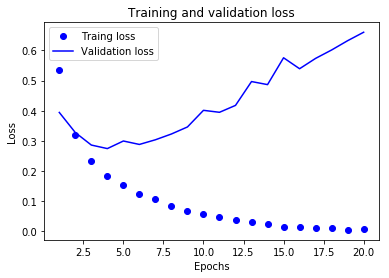

In [55]:
import matplotlib.pyplot as plt

history_dict = history.history
print(history_dict.keys())
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot( epochs, loss_values, 'bo', label='Traing loss')
plt.plot( epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

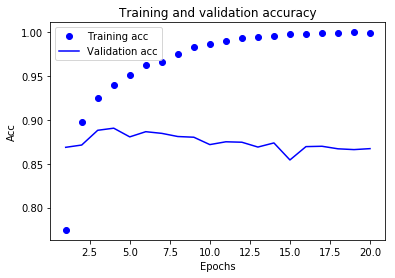

In [56]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

By above validation, we can say the model is overfitting!!

The number of epochs is 3 for stop overfitting. 

In [57]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 49us/step - loss: 0.2218 - acc: 0.9462
Epoch 2/4
25000/25000 [==============================] - 1s 46us/step - loss: 0.1351 - acc: 0.9592
Epoch 3/4
25000/25000 [==============================] - 1s 48us/step - loss: 0.1026 - acc: 0.9696
Epoch 4/4
25000/25000 [==============================] - 1s 50us/step


In [58]:
results

[0.5063697427713871, 0.85872]

There are some things can try to change the prediction accuracy:
    1. change the number of layers
    2. change the number of units in different layers
    3. use different loss function 
    4. use different activation function

# Ex 2 -- classify nesswires (multi-class classification)

In [62]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 19s 9us/step


In [66]:
print(len(train_data),len(test_data))

8982 2246


In [65]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [67]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

557056/550378 [==============================] - 7s 12us/step


In [69]:
train_labels[10]

3

In [71]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

## Data preprocessing

The categorical labels could be encoded by two ways:
    1. One_hot_encoding --- use 'categorical-crossentropy' as loss function
    2. Factorization -- use 'sparse-categorical-crossentropy' as loss function

In [73]:
# transform the training features
x_train.shape

(8982, 10000)

In [75]:
# encoding the labels --- one_hot_encoding
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [82]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc_test_labels = enc.fit_transform(test_labels.reshape(-1,1))
enc_train_labels = enc.fit_transform(train_labels.reshape(-1,1))

In [85]:
print((one_hot_test_labels == enc_test_labels).all())
print((one_hot_test_labels == enc_test_labels).all())

True
True


## Model Building

The different between binary classification with multi-class classification:
    1. There are no differences on input layer
    2. The only difference comes from output layer

In [87]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) 
# here the number of units is 46 = number of multi-labels

In [90]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Model Validation

There is no difference with binary classification

# Ex3 -- prediction house prices (regression)

In [121]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [122]:
train_data.shape

(404, 13)

In [123]:
test_data.shape

(102, 13)

## Data preprocessing

In [125]:
train_data1 = train_data.copy()

In [126]:
# normalizing the data
# do it manually
mean = train_data1.mean(axis=0)
train_data1 -= mean
std = train_data1.std(axis=0)
train_data1 /= std

In [127]:
train_data2 = train_data.copy()

In [128]:
# do it by sklearn 
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
# what we should choose is StandardScaler
scaler = StandardScaler()
train_data2 = scaler.fit_transform(train_data2)

## Model building

In [149]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data2.shape[1] ,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', 
                  loss='mse',
                  metrics=['mae'])
    return(model)

In [146]:
train_data2.shape[1]

13

## Model validation

### k-fold cross validation

In [150]:
# do k-folder manually
import numpy  as np 
k = 4
num_val_samples = len(train_data2) // 4
# num_epochs = 100
all_scores = []

In [169]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data2[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data2[:i*num_val_samples],train_data2[(i+1)*num_val_samples:]],axis=0)
    
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]],axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['mean_absolute_error']
#     val_mse, val_mae=model.evaluate(val_data, val_targets, verbose=0)
#     all_scores.append(val_mae)
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [161]:
all_scores

[2.249683413175073, 2.220593797098292, 2.859968412040484, 2.40535704039111]

In [164]:
np.mean(all_scores)

2.4339006656762394